In [5]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

from datetime import datetime
import time
import csv
sns.set_style("darkgrid")
results_2019 = pd.read_csv('./Runners_all_results_2019.csv', header = 0, encoding='latin-1', error_bad_lines=False)
results_2019['OfficialTime'] = results_2019['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)
results_2019['OfficialTime'] = results_2019['OfficialTime'].apply(lambda x: x.total_seconds()/3600)
results_2019.head(2)

b'Skipping line 26144: expected 20 fields, saw 21\n'


,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,2,Lawrence Cherono,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2.132500,1,1,1,Runners,NaN,NaN
1,6,Lelisa Desisa,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,NaN,ETH,Ethiopia,ETH,Ethiopia,2.133056,2,2,2,Runners,NaN,NaN


change gender to numerical

In [6]:
results_2019.Gender[results_2019.Gender == 'M'] = 1
results_2019.Gender[results_2019.Gender == 'F'] = 0
results_2019.head(2)

/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,2,Lawrence Cherono,"Cherono, Lawrence",30,1,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2.132500,1,1,1,Runners,NaN,NaN
1,6,Lelisa Desisa,"Desisa, Lelisa",29,1,Ambo,NaN,NaN,NaN,ETH,Ethiopia,ETH,Ethiopia,2.133056,2,2,2,Runners,NaN,NaN


import city elevation data

In [7]:
cities_elevation = pd.read_csv('cities.csv', header = 0, sep=' *, *', quotechar = '"', error_bad_lines=False)
cities_elevation['Elevation'] = cities_elevation['Elevation'].apply(pd.to_numeric, errors='coerce')
results_2019 = results_2019.merge(cities_elevation.set_index("City"), left_on='City', right_on="City", how='left')
results_2019.head(2)

/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
Skipping line 286: Expected 2 fields in line 286, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 968: Expected 2 fields in line 968, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 1052: Expected 2 fields in line 1052, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 1186: Expected 2 fields in line 1186, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 1276: Expected 2 fields in line 12

,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,...,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup,Elevation
0,2,Lawrence Cherono,"Cherono, Lawrence",30,1,Eldoret,NaN,NaN,NaN,KEN,...,KEN,Kenya,2.132500,1,1,1,Runners,NaN,NaN,2093.5
1,6,Lelisa Desisa,"Desisa, Lelisa",29,1,Ambo,NaN,NaN,NaN,ETH,...,ETH,Ethiopia,2.133056,2,2,2,Runners,NaN,NaN,2940.0


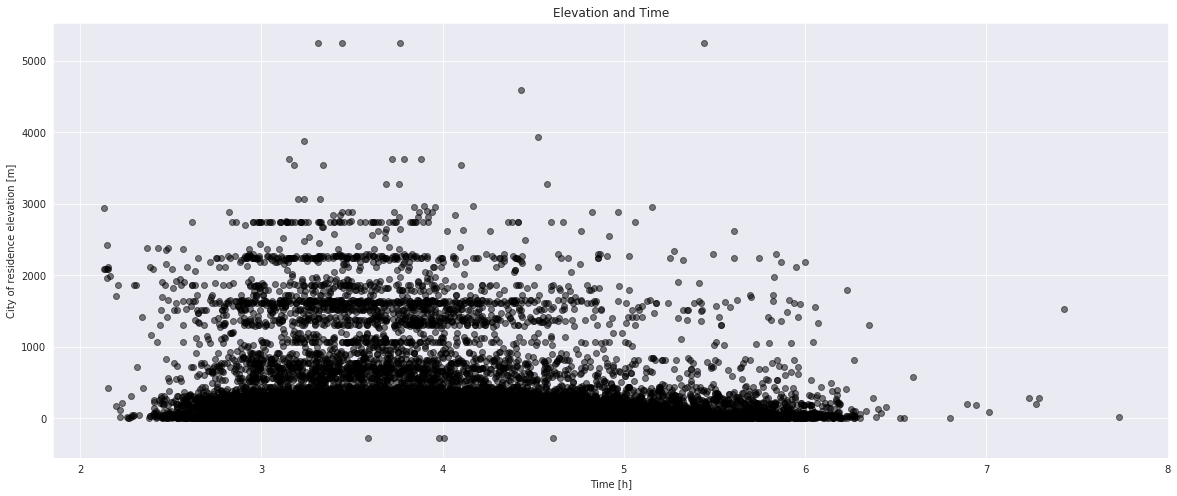

In [11]:
res = results_2019[['OfficialTime', 'Elevation']].dropna()

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(res['OfficialTime'], res['Elevation'], 'o', c = 'black', alpha=0.5)                       # plot given data
ax.set_title('Elevation and Time')
ax.set_xlabel('Time [h]')
ax.set_ylabel('City of residence elevation [m]')
ax.figure.set_size_inches(20,8)

# wykres pokazuje związek wysokości miejsca zamieszkania zawodnika i czasu przez niego uzyskanego